In [60]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

    os.makedirs('/kaggle/working/', exist_ok=True)

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [62]:
path = '/content/Energy_consumption_dataset.csv'
df = pd.read_csv(path)
df

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,1,1,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,1,2,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,1,3,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,1,4,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,12,6,Sunday,Yes,26.338718,52.580000,1563.567259,7,On,On,20.591717,70.270344
4996,12,17,Monday,No,20.007565,42.765607,1999.982252,5,Off,On,7.536319,73.943071
4997,12,13,Thursday,Yes,26.226253,30.015975,1999.982252,5,Off,On,28.162193,85.784613
4998,12,8,Saturday,Yes,24.673206,50.223939,1240.811298,2,On,On,20.918483,63.784001


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB


In [64]:
df.describe()

,Month,Hour,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,6.251200,11.556000,24.946823,45.478146,1507.403201,4.576000,15.201195,76.794919
std,3.588687,6.888306,3.041678,8.972690,293.147209,2.906185,9.157038,9.231573
min,1.000000,0.000000,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,3.000000,6.000000,22.453790,38.111104,1253.906598,2.000000,7.477928,70.419588
50%,6.000000,11.000000,24.831846,45.793124,1513.581105,5.000000,15.343830,76.696267
75%,9.000000,18.000000,27.427281,52.696651,1754.846457,7.000000,22.889997,83.246274
max,12.000000,23.000000,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


In [65]:
df.duplicated().sum()

0

In [66]:
df.isnull().sum()

,0
Month,0
Hour,0
DayOfWeek,0
Holiday,0
Temperature,0
Humidity,0
SquareFootage,0
Occupancy,0
HVACUsage,0
LightingUsage,0


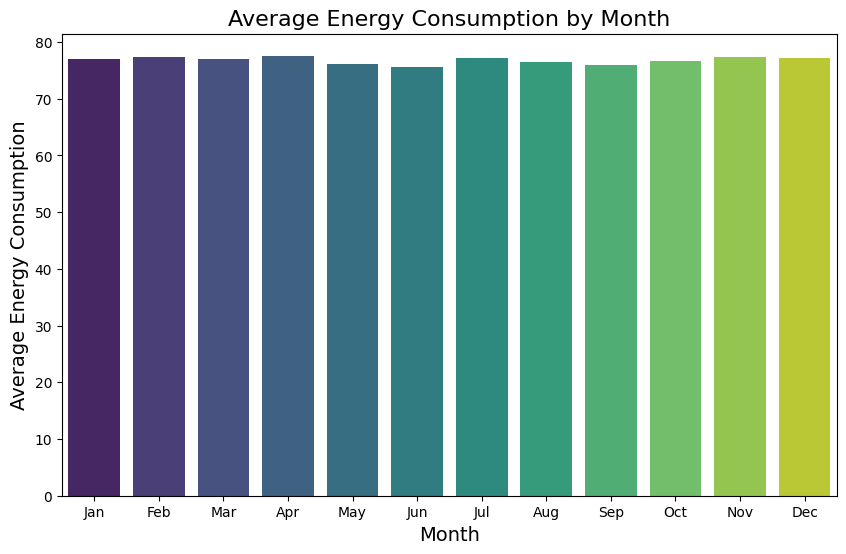

In [67]:
monthly_average_consumption = df.groupby('Month')['EnergyConsumption'].mean().reset_index() # Calculate the average energy consumption for each month
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='EnergyConsumption', data = monthly_average_consumption, palette='viridis') # Use the aggregated data for plotting
plt.title('Average Energy Consumption by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

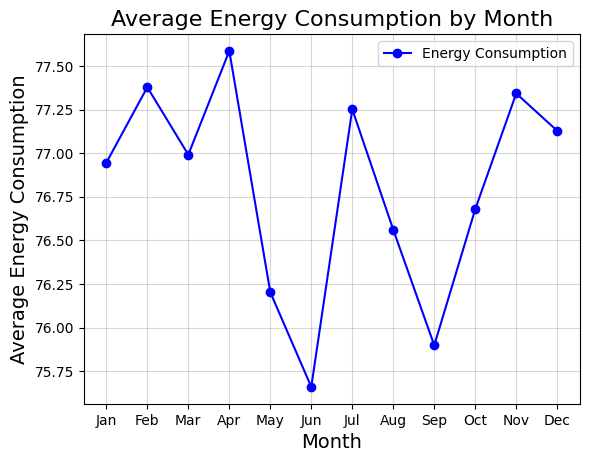

In [68]:
monthly_avg_consumption = df.groupby('Month')['EnergyConsumption'].mean().reset_index()
plt.plot(monthly_avg_consumption['Month'],
         monthly_avg_consumption['EnergyConsumption'],
         marker='o', color='b', label='Energy Consumption')
plt.title('Average Energy Consumption by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [69]:
def get_season(month):
  if month in [3, 4, 5]:
    return 'Summer'
  elif month in [6, 7, 8]:
    return 'Monsoon'
  elif month in [9, 10, 11]:
    return 'Autumn'
  else:
    return 'Winter'
df['Season'] = df['Month'].apply(get_season)
df = df.drop('Month', axis=1)
columns = ['Season'] + [col for col in df.columns if col != 'Season']
df = df[columns]

In [70]:
df.head()

,Season,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,Winter,0,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,Winter,1,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,Winter,2,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,Winter,3,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,Winter,4,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732


In [71]:
df['Season'].unique()

array(['Winter', 'Summer', 'Monsoon', 'Autumn'], dtype=object)

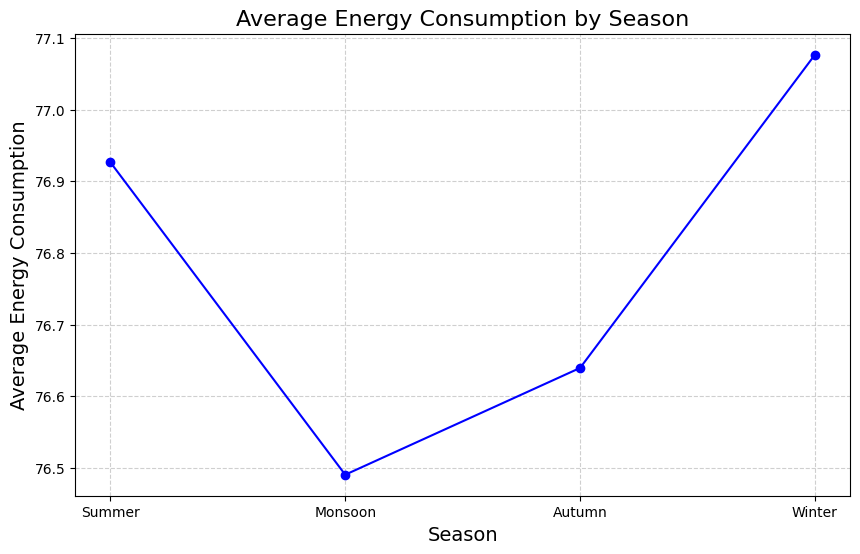

In [72]:
season_avg_consumption = df.groupby('Season')['EnergyConsumption'].mean().reset_index()

season_order = ['Summer', 'Monsoon', 'Autumn', 'Winter']
season_avg_consumption['Season'] = pd.Categorical(season_avg_consumption['Season'], categories = season_order, ordered=True)
season_avg_consumption = season_avg_consumption.sort_values('Season')

plt.figure(figsize=(10, 6))
plt.plot(season_avg_consumption['Season'], season_avg_consumption['EnergyConsumption'], marker='o', linestyle='-', color='b')
plt.title('Average Energy Consumption by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()

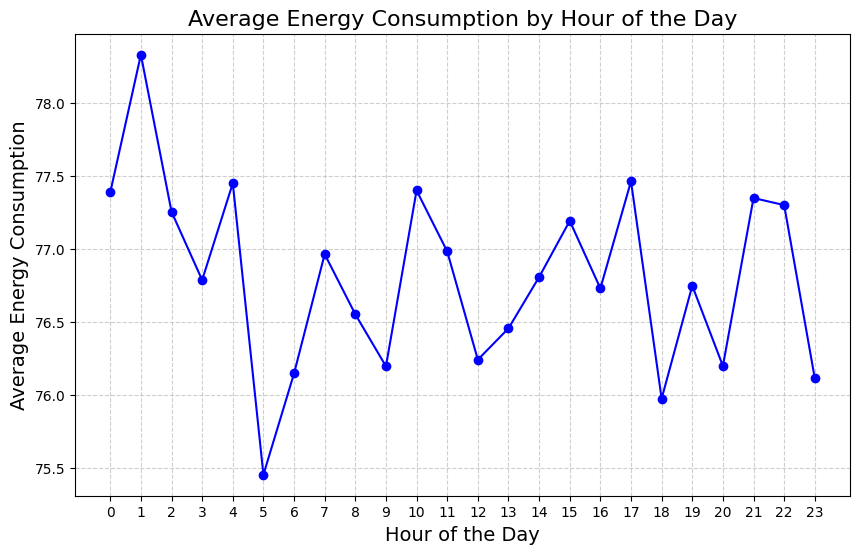

In [73]:
hour_avg_consumption = df.groupby('Hour')['EnergyConsumption'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(hour_avg_consumption['Hour'], hour_avg_consumption['EnergyConsumption'], marker='o', linestyle='-', color='b')
plt.title('Average Energy Consumption by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.xticks(range(0, 24))
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()

In [74]:
def get_time_of_day(hour):
  if 4 <= hour < 12:
    return 'Morning'
  elif 12 <= hour < 16:
    return 'Afternoon'
  elif 16 <= hour < 21:
    return 'Evening'
  else:
    return 'Night'

df['TimeOfDay'] = df['Hour'].apply(get_time_of_day)
df = df.drop('Hour', axis=1)
columns = ['Season', 'TimeOfDay'] + [col for col in df.columns if col not in ['Season', 'TimeOfDay']]
df = df[columns]

In [75]:
df.head()

,Season,TimeOfDay,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,Winter,Night,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,Winter,Night,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,Winter,Night,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,Winter,Night,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,Winter,Morning,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732


In [76]:
df['TimeOfDay'].unique()

array(['Night', 'Morning', 'Afternoon', 'Evening'], dtype=object)

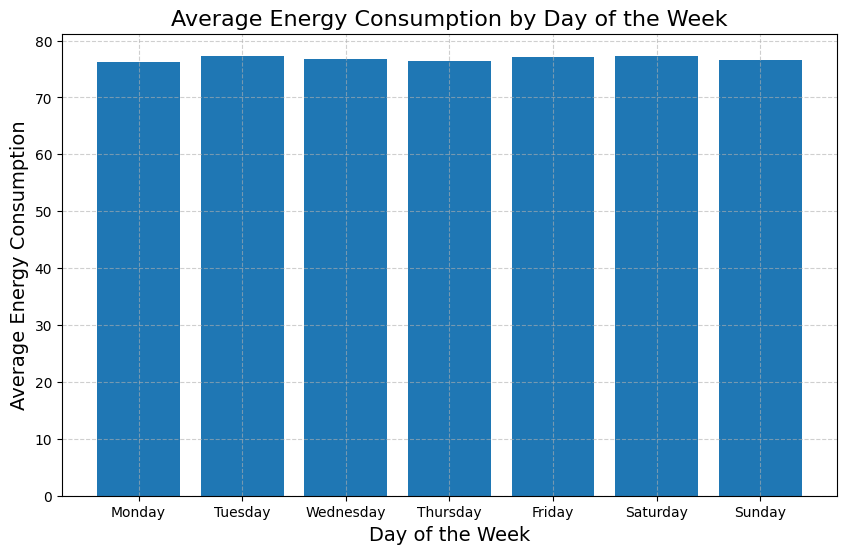

In [77]:
dayofweek_avg_consumption = df.groupby('DayOfWeek')['EnergyConsumption'].mean().reset_index()

# Sort the days of the week to ensure correct order
dayofweek_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dayofweek_avg_consumption['DayOfWeek'] = pd.Categorical(dayofweek_avg_consumption['DayOfWeek'], categories=dayofweek_order, ordered=True)
dayofweek_avg_consumption = dayofweek_avg_consumption.sort_values('DayOfWeek')

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(dayofweek_avg_consumption['DayOfWeek'], dayofweek_avg_consumption['EnergyConsumption'])
plt.title('Average Energy Consumption by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()

In [78]:
df.drop('DayOfWeek', axis=1, inplace=True)

In [79]:
df.head()

,Season,TimeOfDay,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,Winter,Night,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,Winter,Night,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,Winter,Night,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,Winter,Night,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,Winter,Morning,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732


In [80]:
df.shape

(5000, 11)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Season             5000 non-null   object 
 1   TimeOfDay          5000 non-null   object 
 2   Holiday            5000 non-null   object 
 3   Temperature        5000 non-null   float64
 4   Humidity           5000 non-null   float64
 5   SquareFootage      5000 non-null   float64
 6   Occupancy          5000 non-null   int64  
 7   HVACUsage          5000 non-null   object 
 8   LightingUsage      5000 non-null   object 
 9   RenewableEnergy    5000 non-null   float64
 10  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 429.8+ KB


In [82]:
categorical_features = ['Season', 'TimeOfDay', 'Holiday', 'HVACUsage', 'LightingUsage']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df.head()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption,Season_Monsoon,Season_Summer,Season_Winter,TimeOfDay_Evening,TimeOfDay_Morning,TimeOfDay_Night,Holiday_Yes,HVACUsage_On,LightingUsage_On
0,25.139433,43.431581,1565.693999,5,2.774699,75.364373,False,False,True,False,False,True,False,True,False
1,27.731651,54.225919,1411.064918,1,21.831384,83.401855,False,False,True,False,False,True,False,True,True
2,28.704277,58.907658,1755.715009,2,6.764672,78.270888,False,False,True,False,False,True,False,False,False
3,20.080469,50.371637,1452.316318,1,8.623447,56.519850,False,False,True,False,False,True,False,False,True
4,23.097359,51.401421,1094.130359,9,3.071969,70.811732,False,False,True,False,True,False,False,True,False


In [83]:
df.shape

(5000, 15)

In [84]:
X = df.drop(columns=['EnergyConsumption'])
y = df['EnergyConsumption']

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [86]:
X_train.shape

(4000, 14)

In [87]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [88]:
X_train_scaled

array([[0.38356624, 0.16583629, 0.78710351, ..., 1.        , 0.        ,
        1.        ],
       [0.03026714, 0.67376719, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.05697615, 0.34603388, 0.39311902, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.87394221, 0.35380599, 0.58082363, ..., 0.        , 1.        ,
        1.        ],
       [0.60222829, 1.        , 0.88663545, ..., 1.        , 1.        ,
        1.        ],
       [0.31837734, 0.96334379, 0.8799872 , ..., 0.        , 1.        ,
        0.        ]])

In [89]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

In [90]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim = 14))
model.add(Dropout(0.01))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))

In [91]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import Huber
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss=Huber(),
              metrics=['mae'])

In [92]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 32)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
history = model.fit(X_train_scaled, y_train,
                    validation_data =(X_test_scaled, y_test),
                    epochs = 30,
                    batch_size = 32,
                    verbose = 1)

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 76.2554 - mae: 76.7554 - val_loss: 76.0193 - val_mae: 76.5193
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 76.0257 - mae: 76.5257 - val_loss: 75.8943 - val_mae: 76.3943
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 75.9287 - mae: 76.4287 - val_loss: 75.7693 - val_mae: 76.2693
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 75.8031 - mae: 76.3031 - val_loss: 75.6443 - val_mae: 76.1443
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 75.7360 - mae: 76.2360 - val_loss: 75.5193 - val_mae: 76.0193
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 75.8284 - mae: 76.3284 - val_loss: 75.3943 - val_mae: 75.8943
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 75.4253 - mae: 75.9253 - val_loss: 75.2693 - val_mae: 75.7693
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 75.3435 - mae: 75.8435 - val_loss: 75.1443 - val_mae: 75.6443
Epoch 9/30
125/125 ━━━━━

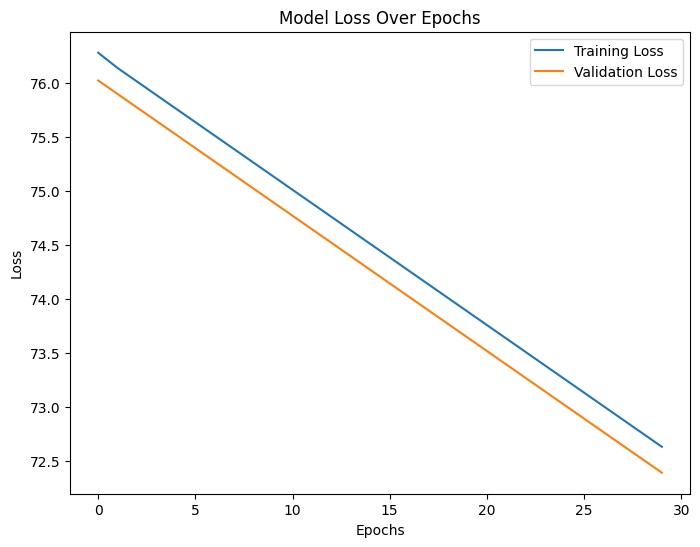

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [95]:
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 72.0646 - mae: 72.5646
Test Loss: 72.3944091796875
Test MAE: 72.8944091796875


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


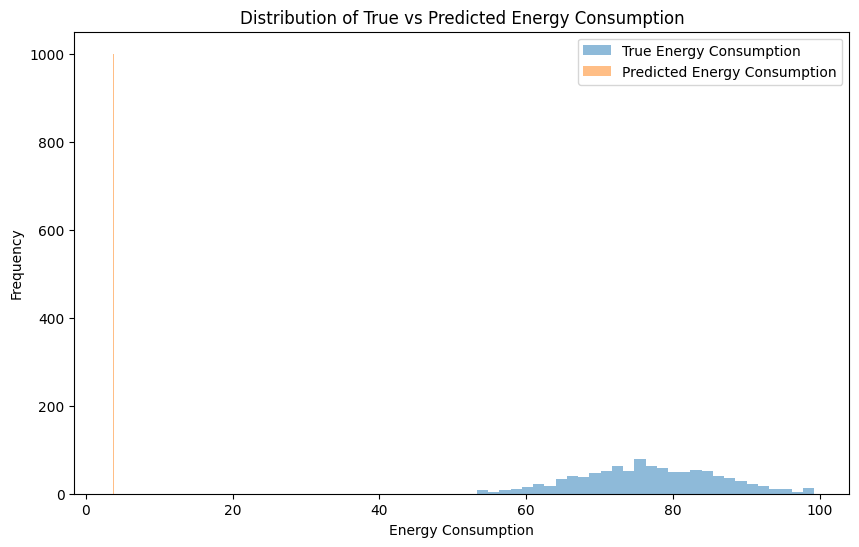

In [96]:
y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=30, alpha=0.5, label='True Energy Consumption')
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted Energy Consumption')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of True vs Predicted Energy Consumption')
plt.legend(loc='upper right')
plt.show()

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import numpy as np
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE: {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')
print(f'Explained Variance Score: {explained_variance}')

Mean Absolute Error (MAE: 72.89439823995266
Mean Squared Error (MSE): 5400.434998380947
Root Mean Squared Error (RMSE): 73.4876520129807
Root Mean Squared Error (RMSE): 73.4876520129807
R² Score: -61.187114871129566
Explained Variance Score: 0.0


In [98]:
model.save('/kaggle/working/model.keras')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/model.keras'